In [1]:
cd drive/MyDrive/AI/

/content/drive/MyDrive/AI


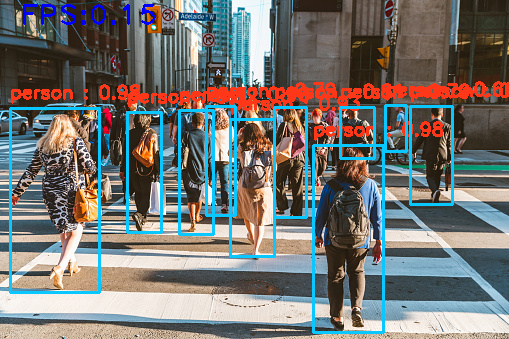

In [13]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms = 0.3
class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]

img = cv2.imread("image1.jpeg")
arc = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640, 640), scale=1/255, swapRB=True)

x = time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y = time.time()
fps = 1 / (y - x)

for (classid, score, box) in zip(classes, scores, boxes):
    if isinstance(classid, (list, np.ndarray)):
        classid_value = classid[0]
    else:
        classid_value = classid

    if class_names[classid_value] == 'person':  # Check if the detected object is a person
        if isinstance(score, (list, np.ndarray)):
            score_value = score[0]
        else:
            score_value = score

        label = "%s : %.2f" % (class_names[classid_value], score_value)
        cv2.rectangle(img, box, color=(255, 200, 10), thickness=2)
        cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (25, 55, 255), 2)

cv2.putText(img, "FPS:{0:.2f}".format(fps), (20, 25), cv2.FONT_HERSHEY_PLAIN, fontScale=2, color=(255, 0, 0), thickness=2)
cv2_imshow(img)
